In [29]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
df = pd.read_csv('African_crises_dataset.csv')
df.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [3]:
# general information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [4]:
# summary stats
df.describe()

,country_number,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000
mean,35.613787,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367
std,23.692402,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765
min,1.000000,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000
25%,15.000000,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000
50%,38.000000,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000
75%,56.000000,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000
max,70.000000,2014.000000,1.000000,744.306139,1.000000,1.000000,0.400000,2.198970e+07,1.000000,2.000000,1.000000


In [5]:
# generate a profile report
profile = ProfileReport(df, title = 'African Crisis Dataset Profile Report')
profile.to_file("African_crises_dataset.csv")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\ydata_profiling\profile_report.py:379: UserWarning: Extension .csv not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
#display report
profile.to_notebook_iframe()

In [7]:
# Check for missing values
df.isnull().sum()

country_number                     0
country_code                       0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [ ]:
# check for duplicates
df.duplicated().sum()

np.int64(0)

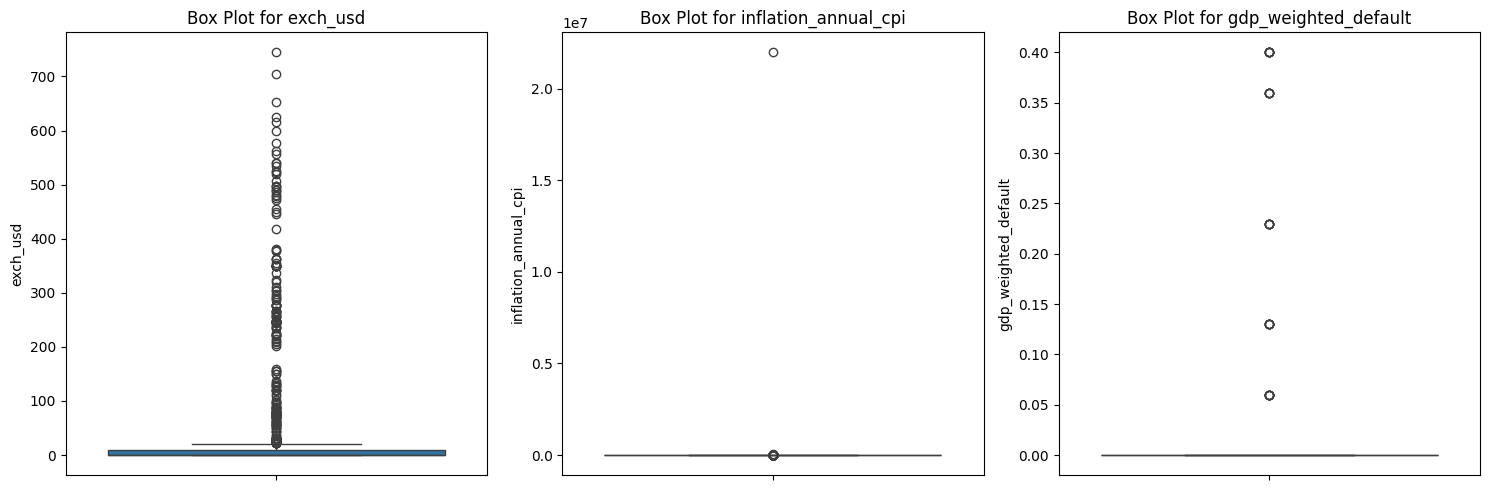

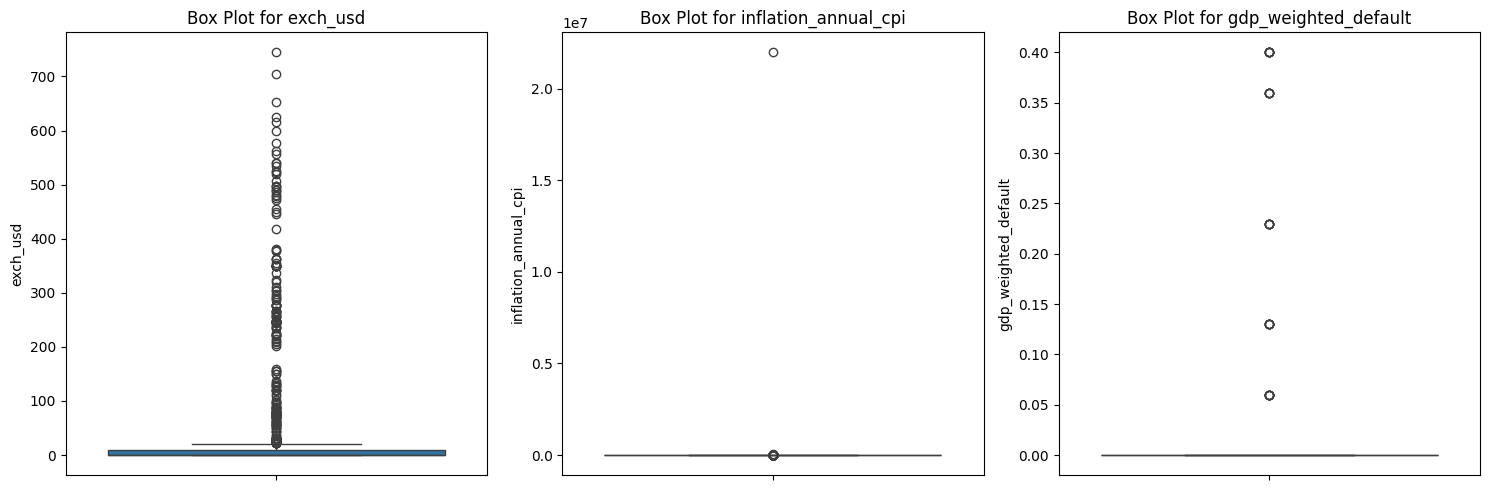

In [13]:
#check for outliers
cols_to_plot = ['exch_usd', 'inflation_annual_cpi', 'gdp_weighted_default']

plt.figure(figsize=(15, 5))
for i, col in enumerate(cols_to_plot):
    plt.subplot(1, len(cols_to_plot), i+1)
    sns.boxplot(y=df[col])
    plt.title(f"Box Plot for {col}")
plt.tight_layout()
plt.show()

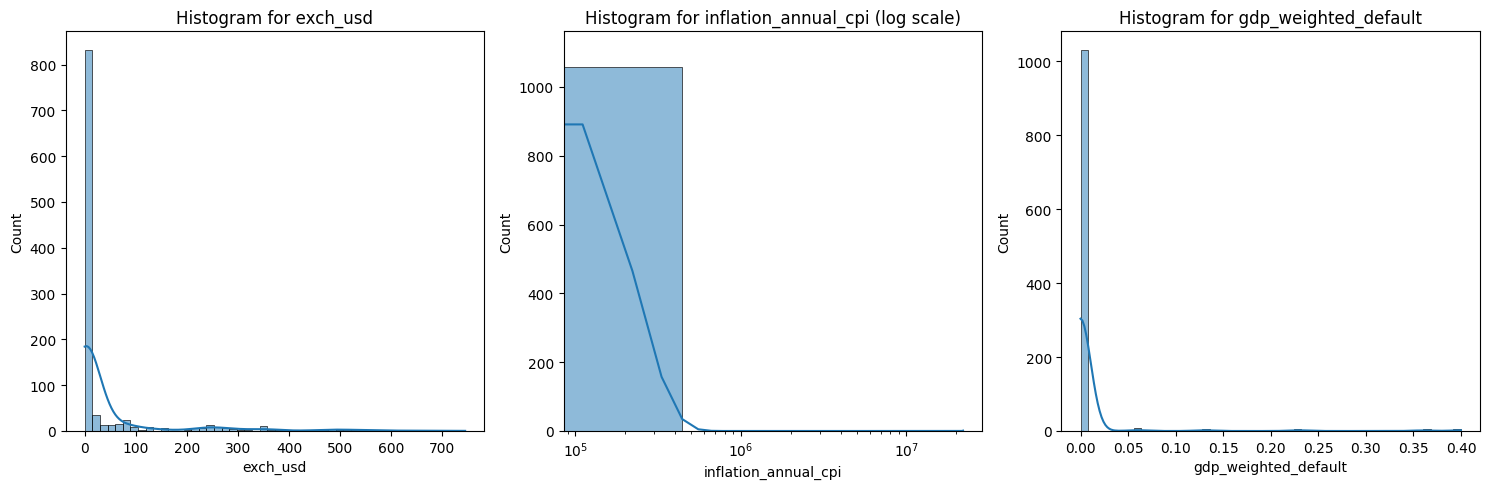

In [17]:
cols_to_plot = ['exch_usd', 'inflation_annual_cpi', 'gdp_weighted_default']

plt.figure(figsize=(15, 5))
for i, col in enumerate(cols_to_plot):
    plt.subplot(1, len(cols_to_plot), i+1)
    # For inflation_annual_cpi, use a logarithmic scale to handle extreme outliers
    if col == 'inflation_annual_cpi':
        sns.histplot(df[col], bins=50, kde=True)
        plt.xscale('log')
        plt.title(f"Histogram for {col} (log scale)")
    else:
        sns.histplot(df[col], bins=50, kde=True)
        plt.title(f"Histogram for {col}")
plt.tight_layout()
plt.show()

In [18]:
# Handle outliers
# apply log transformation to highly skewed numerical features
# this reduces the effect of extreme outliers without removing them

def log_transform(df, columns):
    df_transformed = df.copy()
    for col in columns:
        # Clip values to avoid negative/zero issues
        df_transformed[col] = np.clip(df_transformed[col], a_min=1e-9, a_max=None)
        # Apply log(1 + x) transformation
        df_transformed[col] = np.log1p(df_transformed[col])
    return df_transformed

# Specify the columns that are highly skewed
cols_skewed = ['exch_usd', 'inflation_annual_cpi']

# Apply the transformation
df_transformed = log_transform(df, cols_skewed)

In [19]:
# check the transformation results with describe()
print(df_transformed[cols_skewed].describe())

           exch_usd  inflation_annual_cpi
count  1.059000e+03          1.059000e+03
mean   1.603229e+00          1.881136e+00
std    1.890556e+00          1.324297e+00
min    1.000000e-09          1.000000e-09
25%    1.784390e-01          1.126928e+00
50%    6.250824e-01          1.911367e+00
75%    2.247363e+00          2.537184e+00
max    6.613795e+00          1.690608e+01


In [24]:
# encode categorical features
categorical_cols = ['country_code', 'country', 'banking_crisis']

# apply one-hot encoding
# drop_first = True avoids multicollinearity by removing one dummy column per feature
df_encoded = pd.get_dummies(df_transformed, columns=categorical_cols, drop_first=True)
df_encoded.head()

,country_number,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,...,country_Ivory Coast,country_Kenya,country_Mauritius,country_Morocco,country_Nigeria,country_South Africa,country_Tunisia,country_Zambia,country_Zimbabwe,banking_crisis_no_crisis
0,1,1870,1,0.050944,0,0,0.0,1.490982e+00,0,0,...,False,False,False,False,False,False,False,False,False,False
1,1,1871,0,0.051451,0,0,0.0,2.717944e+00,0,0,...,False,False,False,False,False,False,False,False,False,True
2,1,1872,0,0.050954,0,0,0.0,1.000000e-09,0,0,...,False,False,False,False,False,False,False,False,False,True
3,1,1873,0,0.050389,0,0,0.0,2.501755e+00,0,0,...,False,False,False,False,False,False,False,False,False,True
4,1,1874,0,0.050035,0,0,0.0,1.000000e-09,0,0,...,False,False,False,False,False,False,False,False,False,True


In [27]:
# select target variable and features
y = df_encoded['systemic_crisis'] 
X = df_encoded.drop(['systemic_crisis', 'country_number'], axis=1)

In [28]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [30]:
#select a ML classification algorithm and train it on the training set
# create an instance of logistic regression
model = LogisticRegression(max_iter=100, random_state=42)

# train the model
model.fit(X_train, y_train)

c:\Users\Hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [31]:
# predict on test set
y_pred = model.predict(X_test)

In [32]:
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy: 1.0
Confusion Matrix:
 [[193   0]
 [  0  19]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       193
           1       1.00      1.00      1.00        19

    accuracy                           1.00       212
   macro avg       1.00      1.00      1.00       212
weighted avg       1.00      1.00      1.00       212

